In [1]:
!git clone https://github.com/openai/point-e
%cd point-e
!pip install point -e .

Cloning into 'point-e'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 57 (delta 1), reused 1 (delta 1), pack-reused 50
Unpacking objects: 100% (57/57), 1.56 MiB | 10.08 MiB/s, done.
/kaggle/working/point-e
Obtaining file:///kaggle/working/point-e
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... - done
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-install-sil18029/clip_18439a778956461cabaa41f22ee2573d
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-install-sil18029/clip_18439a778956461cabaa41f22ee2573d
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import torch
from tqdm.auto import tqdm
import plotly.graph_objects as go
from PIL import Image



from point_e.diffusion.configs import DIFFUSION_CONFIGS, diffusion_from_config
from point_e.diffusion.sampler import PointCloudSampler
from point_e.models.download import load_checkpoint
from point_e.models.configs import MODEL_CONFIGS, model_from_config
from point_e.util.plotting import plot_point_cloud

In [3]:
class CFG:
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    BASE_NAME1 = "base40M-textvec"
    BASE_NAME2 = 'base40M'
    GUIDANCE_SCALE = [3.0,0.0]


From https://www.kaggle.com/code/burhanuddinlatsaheb/text-to-3d-images-point-e


In [4]:
# helper function 
def plot_3d(pc):
    fig = go.Figure(
            data = [
                go.Scatter3d(
                x = pc.coords[:,0] , y = pc.coords[:,1] , z = pc.coords[:,2],
                mode = "markers" ,
                marker = dict( size =2,
                        color = ["rgb({},{},{})".format(r,g,b) for r,g,b in zip(pc.channels["R"] , pc.channels["G"] , pc.channels["B"])],

                    ) )
            ],
            layout = dict(
                scene=dict(
                    xaxis = dict(visible = False), yaxis = dict(visible = False), zaxis = dict(visible = False)               )
            ), )
    return fig



# Image2pointcloud

In [5]:

base_model = model_from_config(MODEL_CONFIGS[CFG.BASE_NAME2] , CFG.DEVICE)
base_model.eval()
base_diffusion = diffusion_from_config(DIFFUSION_CONFIGS[CFG.BASE_NAME2])

upsampler_model = model_from_config(MODEL_CONFIGS["upsample"], CFG.DEVICE)
upsampler_model.eval()
upsampler_diffusion = diffusion_from_config(DIFFUSION_CONFIGS["upsample"])
base_model.load_state_dict(load_checkpoint(CFG.BASE_NAME2 , CFG.DEVICE))
upsampler_model.load_state_dict(load_checkpoint("upsample" , CFG.DEVICE))

100%|███████████████████████████████████████| 890M/890M [00:22<00:00, 40.9MiB/s]


  0%|          | 0.00/162M [00:00<?, ?iB/s]

  0%|          | 0.00/162M [00:00<?, ?iB/s]

<All keys matched successfully>

In [6]:
sampler = PointCloudSampler(
    device= CFG.DEVICE,
    models=[base_model, upsampler_model],
    diffusions=[base_diffusion, upsampler_diffusion],
    num_points=[1024, 4096 - 1024],
    aux_channels=['R', 'G', 'B'],
    guidance_scale=[3.0, 3.0],
)

0it [00:00, ?it/s]

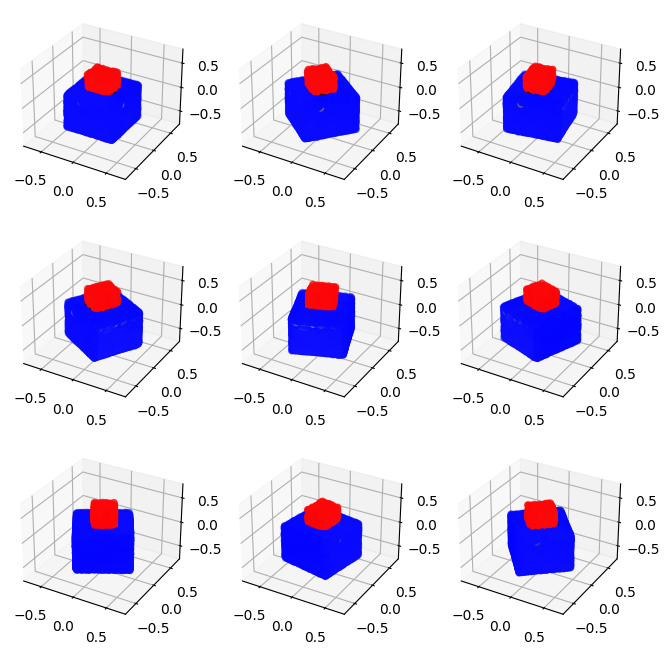

In [7]:

img = Image.open('/kaggle/input/muhimagesample/cube_stack.jpg')

# Produce a sample from the model.
samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img]))):
    samples = x

pc = sampler.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=3, fixed_bounds=((-0.75, -0.75, -0.75),(0.75, 0.75, 0.75)))

0it [00:00, ?it/s]

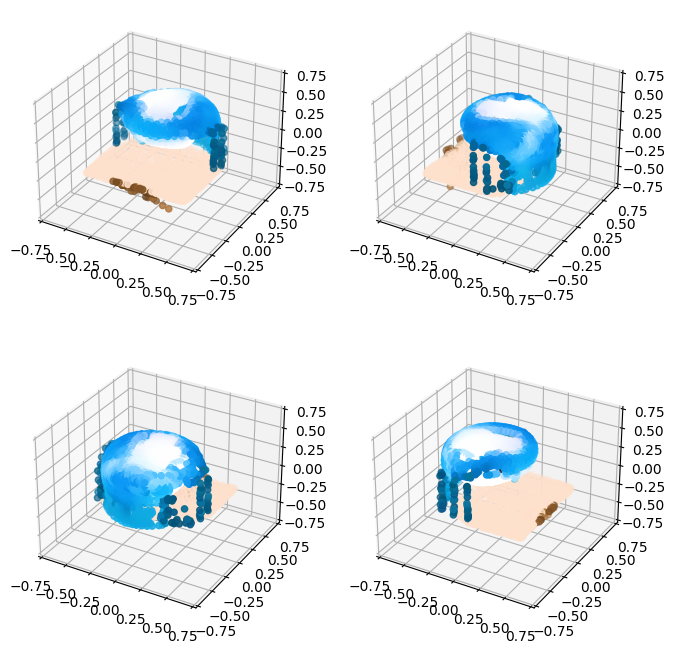

In [8]:

img = Image.open('/kaggle/input/muhimagesample/img1.jpg')

# Produce a sample from the model.
samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img]))):
    samples = x

pc = sampler.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=2, fixed_bounds=((-0.75, -0.75, -0.75),(0.75, 0.75, 0.75)))

0it [00:00, ?it/s]

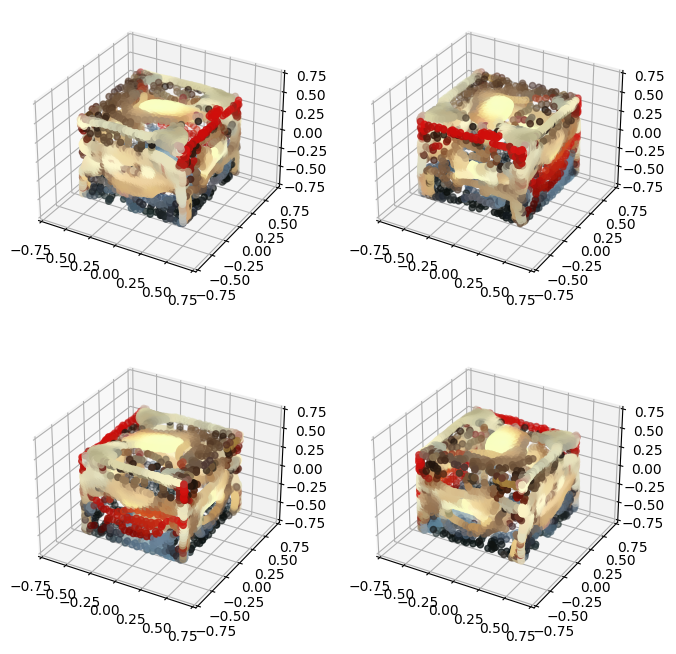

In [9]:

img = Image.open('/kaggle/input/muhimagesample/img2.jpg')

# Produce a sample from the model.
samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img]))):
    samples = x

pc = sampler.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=2, fixed_bounds=((-0.75, -0.75, -0.75),(0.75, 0.75, 0.75)))

0it [00:00, ?it/s]

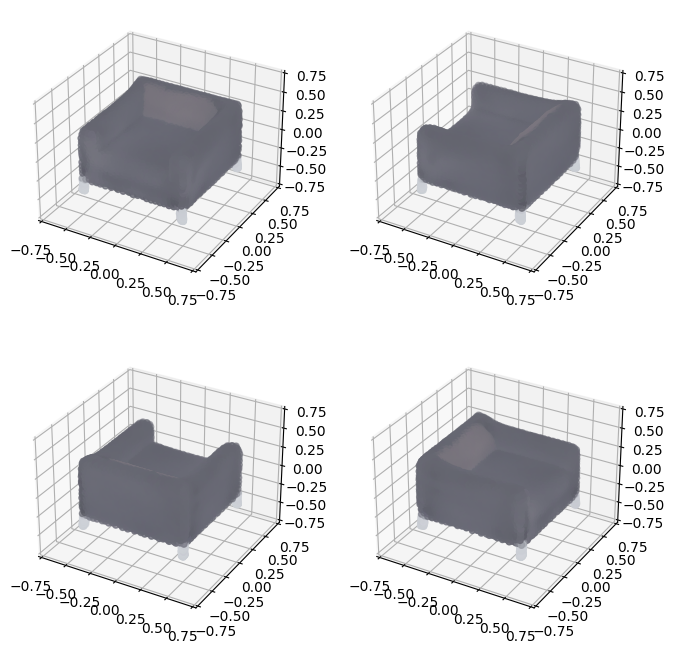

In [10]:

img = Image.open('/kaggle/input/muhimagesample/img3.jpg')

# Produce a sample from the model.
samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img]))):
    samples = x

pc = sampler.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=2, fixed_bounds=((-0.75, -0.75, -0.75),(0.75, 0.75, 0.75)))